# Credit Risk Prediction

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann.

In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

https://www.kaggle.com/datasets/uciml/german-credit?resource=download

In [1]:
!pip install scikit-learn==1.3.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: german_credit_data.csv  


In [4]:
df = pd.read_csv('/content/german_credit_data.csv')

In [5]:
df.sample()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
820,820,27,male,2,own,little,NaN,1101,12,car


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

**Goal: Predict loan default risk and explain predictions to non-technical stakeholders.**

In [9]:
df['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


<Axes: xlabel='Credit amount', ylabel='Sex'>

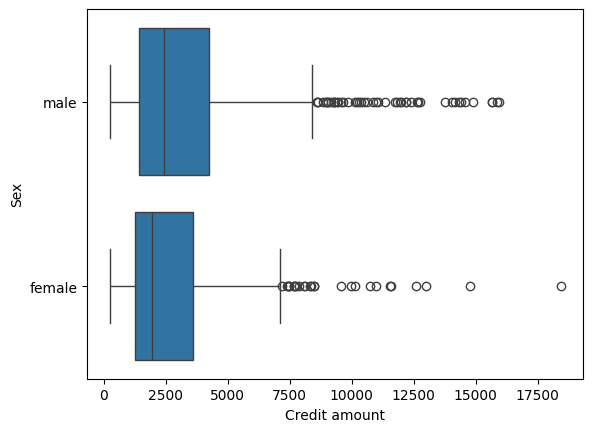

In [10]:
sns.boxplot(x='Credit amount', y='Sex', data=df)

In [11]:
df['Job']= df['Job'].astype(object)

<Axes: xlabel='Job', ylabel='Credit amount'>

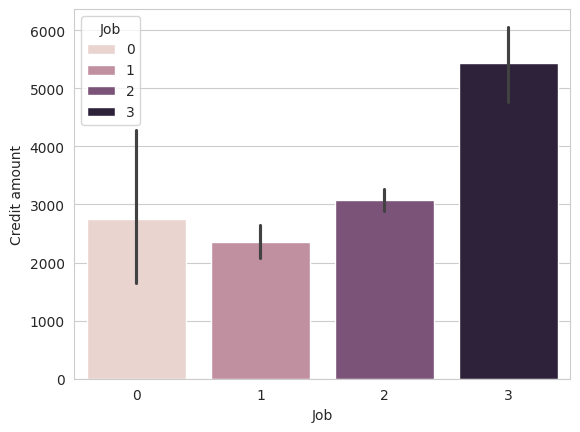

In [12]:
sns.set_style('whitegrid')
sns.barplot(x='Job', y='Credit amount', data=df, hue='Job')

<Axes: xlabel='Duration', ylabel='Credit amount'>

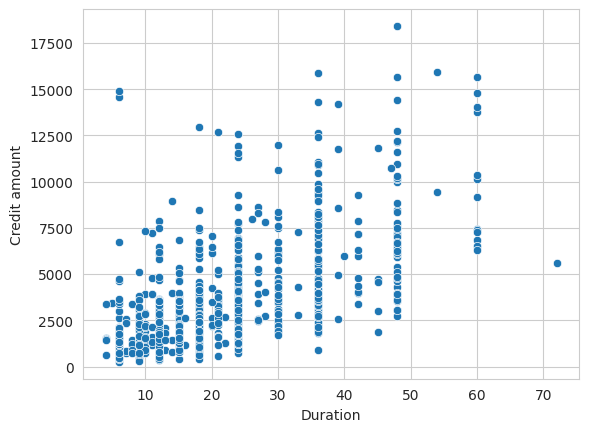

In [13]:
sns.scatterplot(x='Duration', y='Credit amount', data=df)

<Axes: xlabel='Job,Sex'>

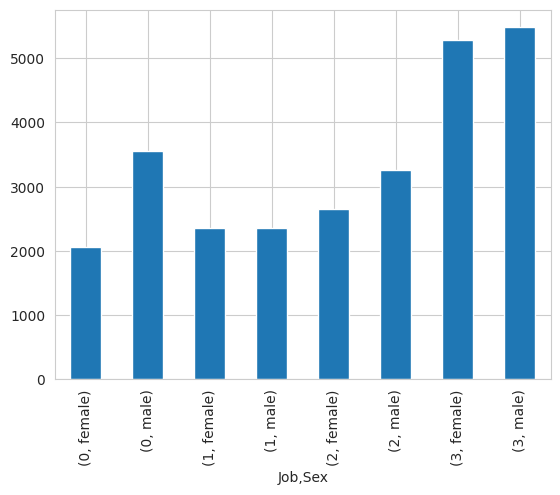

In [14]:
df.groupby(['Job', 'Sex'])['Credit amount'].mean().plot(kind='bar')

In [15]:
df['Purpose'].value_counts()

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

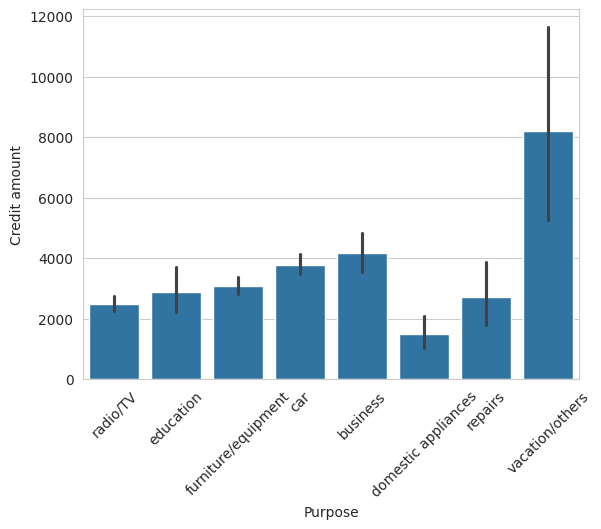

In [16]:
sns.barplot(x='Purpose', y='Credit amount', data=df)
plt.xticks(rotation=45)

In [17]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [18]:
df['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [19]:
df['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


need to create target feature (binary) = risk

1 = high risk
0 = low risk

In [20]:
def per_month_repay(df):
  return df['Credit amount']/df['Duration']


In [21]:
df['credit_repayment_per_month'] = per_month_repay(df)

In [22]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month
54,57,male,2,free,little,moderate,2225,36,car,61.805556


In [23]:
df.isna().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
credit_repayment_per_month,0


In [24]:
null_rows_df = df[df.isna().any(axis=1)]


In [25]:
null_rows_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month
0,67,male,2,own,NaN,little,1169,6,radio/TV,194.833333
2,49,male,1,own,little,NaN,2096,12,education,174.666667
5,35,male,1,free,NaN,NaN,9055,36,education,251.527778
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,118.125000
8,61,male,1,own,rich,NaN,3059,12,radio/TV,254.916667
...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,104.600000
992,23,male,1,rent,NaN,little,1936,18,radio/TV,107.555556
994,50,male,2,own,NaN,NaN,2390,12,car,199.166667
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,144.666667


In [26]:
df['Credit amount'].describe()

,Credit amount
count,1000.000000
mean,3271.258000
std,2822.736876
min,250.000000
25%,1365.500000
50%,2319.500000
75%,3972.250000
max,18424.000000


In [27]:
df['Credit amount'].quantile(0.2)

1262.0

In [28]:
def categorise_credit_amount(row, quantiles):
    if row['Credit amount'] <= quantiles[0.2]:
        return "Very_Low"
    elif row['Credit amount'] <= quantiles[0.4]:
        return "Low"
    elif row['Credit amount'] <= quantiles[0.6]:
        return "Medium"
    elif row['Credit amount'] <= quantiles[0.8]:
        return "High"
    else:
        return "Very_High"

# Precompute quantiles
quantiles = df['Credit amount'].quantile([0.2, 0.4, 0.6, 0.8])

# Apply function row-wise
df['Credit_Category'] = df.apply(lambda row: categorise_credit_amount(row, quantiles), axis=1)


In [29]:
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category
490,26,male,2,own,little,NaN,1934,12,radio/TV,161.166667,Medium
184,36,male,2,own,little,moderate,884,18,car,49.111111,Very_Low
721,24,female,2,rent,rich,moderate,433,6,education,72.166667,Very_Low


In [30]:
null_rows_df = df[df.isna().any(axis=1)]


In [31]:
null_rows_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category
0,67,male,2,own,NaN,little,1169,6,radio/TV,194.833333,Very_Low
2,49,male,1,own,little,NaN,2096,12,education,174.666667,Medium
5,35,male,1,free,NaN,NaN,9055,36,education,251.527778,Very_High
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,118.125000,Medium
8,61,male,1,own,rich,NaN,3059,12,radio/TV,254.916667,High
...,...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,104.600000,Low
992,23,male,1,rent,NaN,little,1936,18,radio/TV,107.555556,Medium
994,50,male,2,own,NaN,NaN,2390,12,car,199.166667,Medium
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,144.666667,Low


In [32]:
df['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [33]:
df['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


In [34]:
saving_map = {'unknown': 0, 'little': 1, 'moderate': 2, 'rich': 3, 'quite rich': 4}
checking_map = {'none': 0, 'little': 1, 'moderate': 2, 'rich': 3}

df['Saving accounts_num'] = df['Saving accounts'].map(saving_map)
df['Checking account_num'] = df['Checking account'].map(checking_map)


In [35]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category,Saving accounts_num,Checking account_num
0,67,male,2,own,NaN,little,1169,6,radio/TV,194.833333,Very_Low,NaN,1.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,123.979167,Very_High,1.0,2.0
2,49,male,1,own,little,NaN,2096,12,education,174.666667,Medium,1.0,NaN
3,45,male,2,free,little,little,7882,42,furniture/equipment,187.666667,Very_High,1.0,1.0
4,53,male,2,free,little,little,4870,24,car,202.916667,Very_High,1.0,1.0


In [36]:
null_rows_df = df[df.isna().any(axis=1)]


In [37]:
null_rows_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category,Saving accounts_num,Checking account_num
0,67,male,2,own,NaN,little,1169,6,radio/TV,194.833333,Very_Low,NaN,1.0
2,49,male,1,own,little,NaN,2096,12,education,174.666667,Medium,1.0,NaN
5,35,male,1,free,NaN,NaN,9055,36,education,251.527778,Very_High,NaN,NaN
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,118.125000,Medium,4.0,NaN
8,61,male,1,own,rich,NaN,3059,12,radio/TV,254.916667,High,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,104.600000,Low,2.0,NaN
992,23,male,1,rent,NaN,little,1936,18,radio/TV,107.555556,Medium,NaN,1.0
994,50,male,2,own,NaN,NaN,2390,12,car,199.166667,Medium,NaN,NaN
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,144.666667,Low,1.0,NaN


In [38]:
df['Age'].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [39]:
df['Age'].quantile(0.4)

30.0

In [40]:
quantiles = df['Age'].quantile([0.2, 0.4, 0.6, 0.8])
bins = [0, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], df['Age'].max()]
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


In [41]:
age_bin_medians = df.groupby('Age_bin')['Saving accounts_num'].median()


/tmp/ipython-input-1814223506.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_medians = df.groupby('Age_bin')['Saving accounts_num'].median()


In [42]:
def fill_savings_by_age_bin(row, medians):
    if pd.isna(row['Saving accounts_num']):
        return medians.get(row['Age_bin'], df['Saving accounts_num'].median())
    else:
        return row['Saving accounts_num']


In [43]:
df['Saving accounts_num'] = df.apply(lambda row: fill_savings_by_age_bin(row, age_bin_medians), axis=1)


In [44]:
df['Age_bin_check'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


In [45]:
age_bin_medians = df.groupby('Age_bin_check')['Checking account_num'].median()


/tmp/ipython-input-1021152101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_medians = df.groupby('Age_bin_check')['Checking account_num'].median()


In [46]:
def fill_checking_by_age_bin(row, medians):
    if pd.isna(row['Checking account_num']):
        return medians.get(row['Age_bin_check'], df['Checking account_num'].median())
    else:
        return row['Checking account_num']


In [47]:
df['Checking account_num'] = df.apply(lambda row: fill_checking_by_age_bin(row, age_bin_medians), axis=1)


In [48]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category,Saving accounts_num,Checking account_num,Age_bin,Age_bin_check
0,67,male,2,own,NaN,little,1169,6,radio/TV,194.833333,Very_Low,1.0,1.0,Q5,Q5
1,22,female,2,own,little,moderate,5951,48,radio/TV,123.979167,Very_High,1.0,2.0,Q1,Q1
2,49,male,1,own,little,NaN,2096,12,education,174.666667,Medium,1.0,2.0,Q5,Q5
3,45,male,2,free,little,little,7882,42,furniture/equipment,187.666667,Very_High,1.0,1.0,Q4,Q4
4,53,male,2,free,little,little,4870,24,car,202.916667,Very_High,1.0,1.0,Q5,Q5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,144.666667,Low,1.0,2.0,Q3,Q3
996,40,male,3,own,little,little,3857,30,car,128.566667,High,1.0,1.0,Q4,Q4
997,38,male,2,own,little,NaN,804,12,radio/TV,67.000000,Very_Low,1.0,2.0,Q4,Q4
998,23,male,2,free,little,little,1845,45,radio/TV,41.000000,Low,1.0,1.0,Q1,Q1


In [49]:
new_df = df[['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose', 'credit_repayment_per_month', 'Credit_Category', 'Saving accounts_num', 'Checking account_num']]

In [50]:
new_df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category,Saving accounts_num,Checking account_num
0,67,male,2,own,1169,6,radio/TV,194.833333,Very_Low,1.0,1.0
1,22,female,2,own,5951,48,radio/TV,123.979167,Very_High,1.0,2.0
2,49,male,1,own,2096,12,education,174.666667,Medium,1.0,2.0
3,45,male,2,free,7882,42,furniture/equipment,187.666667,Very_High,1.0,1.0
4,53,male,2,free,4870,24,car,202.916667,Very_High,1.0,1.0


binary yes/ no classification

- High risk = 1
- Low risk = 0

function based on the savings and checking account if lower than certain % of credit amount then high risk

In [51]:
new_df['credit_repayment_per_month'].describe()

,credit_repayment_per_month
count,1000.000000
mean,167.687020
std,153.490959
min,24.055556
25%,89.600000
50%,130.333333
75%,206.183333
max,2482.666667


<Axes: xlabel='credit_repayment_per_month'>

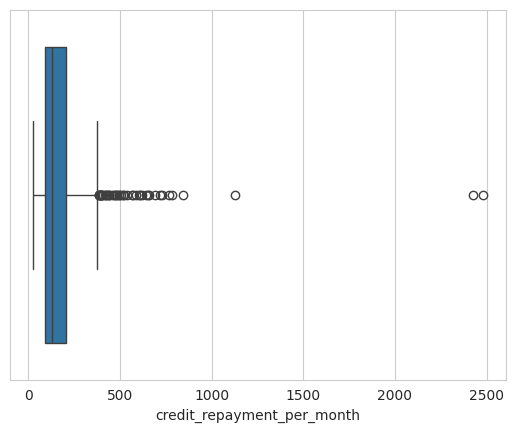

In [52]:
sns.boxplot(x='credit_repayment_per_month', data=new_df)

<Axes: xlabel='Duration', ylabel='credit_repayment_per_month'>

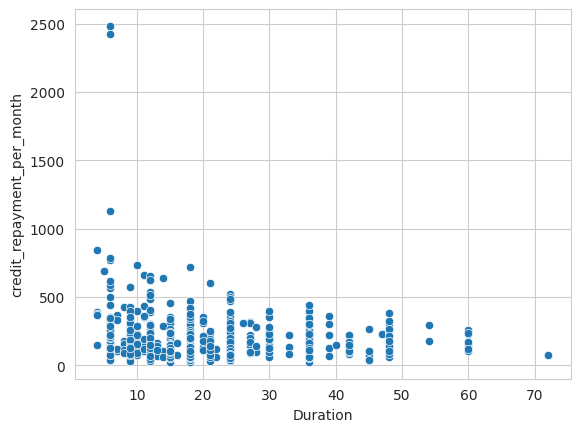

In [53]:
sns.scatterplot(x='Duration', y='credit_repayment_per_month', data =new_df)

In [54]:
new_df['Years_to_repay'] = df['Duration']/12

/tmp/ipython-input-4155992123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Years_to_repay'] = df['Duration']/12


In [55]:
new_df['Years_to_repay'].describe()

,Years_to_repay
count,1000.000000
mean,1.741917
std,1.004901
min,0.333333
25%,1.000000
50%,1.500000
75%,2.000000
max,6.000000


<Axes: xlabel='Duration', ylabel='Count'>

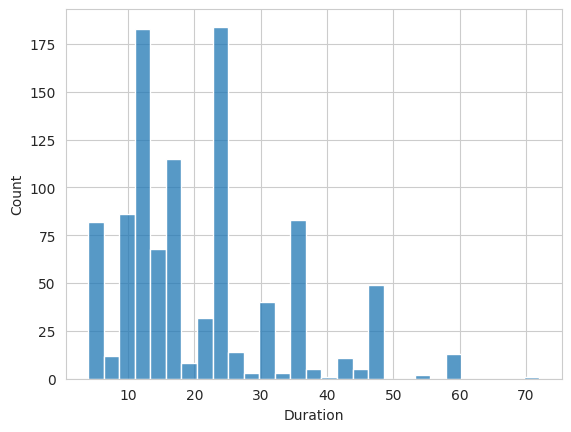

In [56]:
sns.histplot(x='Duration', data=new_df)

<Axes: xlabel='Years_to_repay', ylabel='Count'>

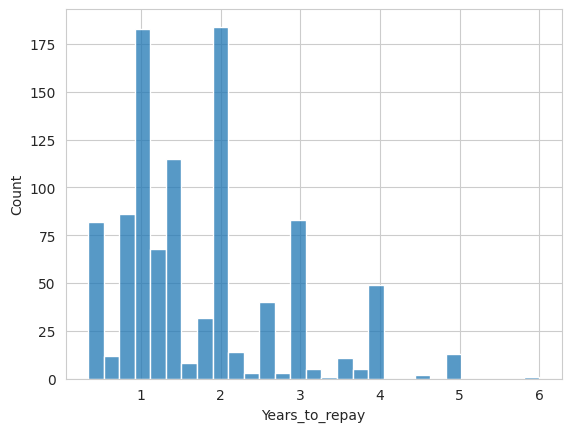

In [57]:
sns.histplot(x='Years_to_repay', data=new_df)

In [59]:
new_df['Duration'].describe()

,Duration
count,1000.000000
mean,20.903000
std,12.058814
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000


In [ ]:
new_df.head()

In [198]:
new_df['Housing'].value_counts()

,count
Housing,
own,713
rent,179
free,108


one hot encode
- housing
- purpose
- savings accounts
- checking account

In [199]:
new_df = new_df.drop(columns=['Sex'])

In [200]:
new_df.sample()

,Age,Job,Housing,Credit amount,Duration,Purpose,credit_repayment_per_month,Credit_Category,Saving accounts_num,Checking account_num,Years_to_repay
221,23,2,rent,1200,12,education,100.0,Very_Low,1.0,1.0,1.0


In [201]:
new_df = new_df.drop(columns=['Credit_Category'])

In [202]:
new_df['Checking account_num'].value_counts()

,count
Checking account_num,
2.0,663
1.0,274
3.0,63


In [203]:
new_df['Saving accounts_num'].value_counts()

,count
Saving accounts_num,
1.0,786
2.0,103
4.0,63
3.0,48


Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [204]:
new_df['Job'].value_counts()

,count
Job,
2,630
1,200
3,148
0,22


In [205]:
new_df['Job'] = new_df['Job'].astype(np.int64)

In [206]:
grouped_credit_df = new_df.groupby(['Job', 'Housing', 'Checking account_num', 'Saving accounts_num'])[['credit_repayment_per_month']].describe()

In [207]:
grouped_credit_df.head(15)

credit_repayment_per_month  \
                                                                          count   
Job Housing Checking account_num Saving accounts_num                              
0   free    1.0                  1.0                                        1.0   
            2.0                  1.0                                        2.0   
            3.0                  4.0                                        1.0   
    own     1.0                  1.0                                        3.0   
            2.0                  1.0                                        7.0   
            3.0                  1.0                                        2.0   
                                 3.0                                        1.0   
    rent    1.0                  1.0                                        1.0   
                                 4.0                                        1.0   
            2.0                  1.0                                        2.0   
                                 4.0                                        1.0   
1   free    1.0                  1.0                                        2.0   
            2.0                  1.0                                        3.0   
                                 2.0                                        1.0   
                                 4.0                                        1.0   

                                                                              \
                                                            mean         std   
Job Housing Checking account_num Saving accounts_num                           
0   free    1.0                  1.0                   66.111111         NaN   
            2.0                  1.0                   92.770833   27.341462   
            3.0                  4.0                  123.333333         NaN   
    own     1.0                  1.0                   86.621693   48.125066   
            2.0                  1.0                  451.198413  872.115374   
            3.0                  1.0                  133.625000  117.202949   
                                 3.0                  118.166667         NaN   
    rent    1.0                  1.0                   49.708333         NaN   
                                 4.0                  225.333333         NaN   
            2.0                  1.0                  370.600000  356.476099   
                                 4.0                  156.583333         NaN   
1   free    1.0                  1.0                  104.045139   33.847827   
            2.0                  1.0                  185.689815   95.193823   
                                 2.0                   80.083333         NaN   
                                 4.0                  278.555556         NaN   

                                                                              \
                                                             min         25%   
Job Housing Checking account_num Saving accounts_num                           
0   free    1.0                  1.0                   66.111111   66.111111   
            2.0                  1.0                   73.437500   83.104167   
            3.0                  4.0                  123.333333  123.333333   
    own     1.0                  1.0                   41.666667   61.238095   
            2.0                  1.0                   61.000000   94.000000   
            3.0                  1.0                   50.750000   92.187500   
                                 3.0                  118.166667  118.166667   
    rent    1.0                  1.0                   49.708333   49.708333   
                                 4.0                  225.333333  225.333333   
            2.0                  1.0                  118.533333  244.566667   
                                 4.0                  156.583333  156.583333 

## Numerical Risk Score

- Low Risk = 1
- Moderate Risk = 2
- High Risk = 3

In [208]:
job_risk = {0:3, 1:2, 2:1, 3:1}
housing_risk = {'free':1, 'rent':2, 'own':1}
checking_risk = {1:3, 2:2, 3:1}
saving_risk = {1:3, 2:2, 3:1, 4:1}

In [209]:
repayment_threshold = new_df['credit_repayment_per_month'].median()

In [282]:
repayment_threshold

130.33333333333331

In [210]:
duration_threshold = new_df['Duration'].median()

In [283]:
duration_threshold

18.0

In [211]:
upper_duration_threshold = new_df['Duration'].quantile(0.75)

In [284]:
upper_duration_threshold

np.float64(24.0)

In [212]:
repayment_threshold

130.33333333333331

In [213]:
def calculate_risk_score(row):
  score = 0
  score += job_risk.get(row['Job'],2)
  score += housing_risk.get(row['Housing'],2)
  score += checking_risk.get(row['Checking account_num'],2)
  score += saving_risk.get(row['Saving accounts_num'],2)

  if row['credit_repayment_per_month'] >= repayment_threshold:
    score += 1
  if row['Age'] >= 65 and row['Duration'] > 24:
    score += 1
  if row['Duration'] > duration_threshold and row['Duration'] < upper_duration_threshold:
    score -= 1
  if row['Duration'] > duration_threshold and row['Duration'] >= upper_duration_threshold:
    score -= 2
  return score

In [214]:
new_df['Risk_Score'] = new_df.apply(calculate_risk_score, axis=1)

In [215]:
new_df['Risk_Score'].describe()

,Risk_Score
count,1000.00000
mean,6.94300
std,1.62739
min,2.00000
25%,6.00000
50%,7.00000
75%,8.00000
max,11.00000


<Axes: xlabel='Risk_Score', ylabel='count'>

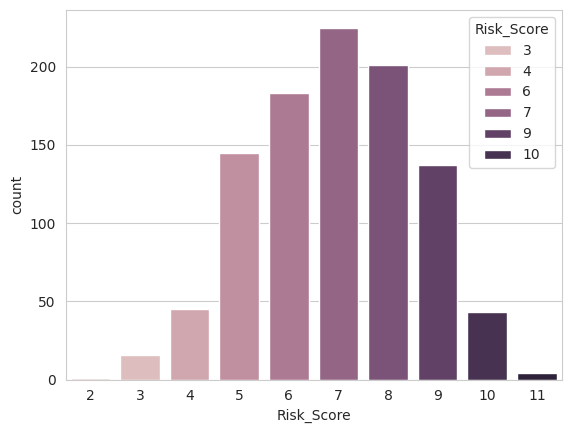

In [216]:
sns.countplot(x='Risk_Score', hue='Risk_Score',data=new_df)

In [217]:
new_df['Risk_Score'].median()

7.0

In [218]:
def categorise_risk(score):
  if score >= 6 and score <8:
    return "Moderate Risk"
  elif score < 6:
    return "Low Risk"
  else:
    return "High Risk"

In [219]:
new_df['Risk_Level'] = new_df['Risk_Score'].apply(categorise_risk)

<Axes: xlabel='Risk_Level', ylabel='count'>

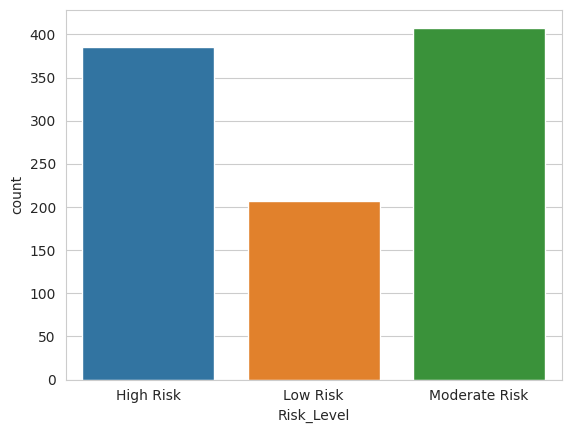

In [220]:
sns.countplot(x='Risk_Level', hue='Risk_Level', data=new_df)

<Axes: xlabel='Age', ylabel='Risk_Score'>

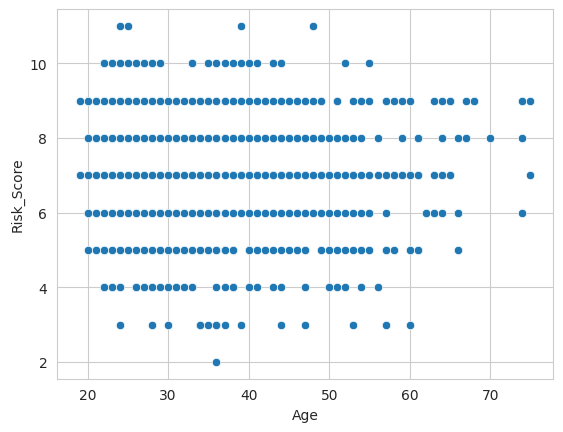

In [221]:
sns.scatterplot(x='Age', y='Risk_Score', data=new_df)

<Axes: xlabel='Duration', ylabel='credit_repayment_per_month'>

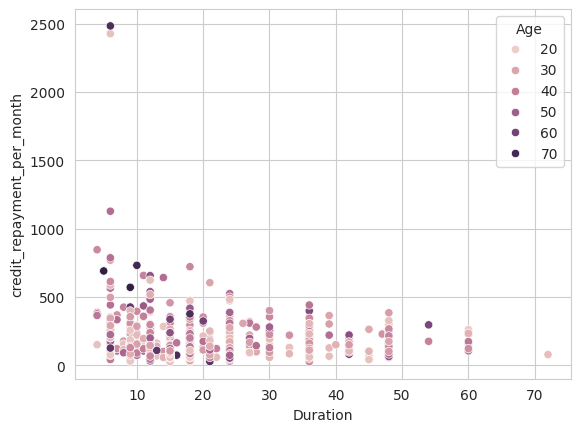

In [222]:
sns.scatterplot(x='Duration', y='credit_repayment_per_month', hue='Age', data=new_df)

## Inspect Features with Target

In [223]:
new_df.sample()

,Age,Job,Housing,Credit amount,Duration,Purpose,credit_repayment_per_month,Saving accounts_num,Checking account_num,Years_to_repay,Risk_Score,Risk_Level
410,20,2,own,1967,24,radio/TV,81.958333,1.0,2.0,2.0,5,Low Risk


<Axes: xlabel='Age', ylabel='Risk_Level'>

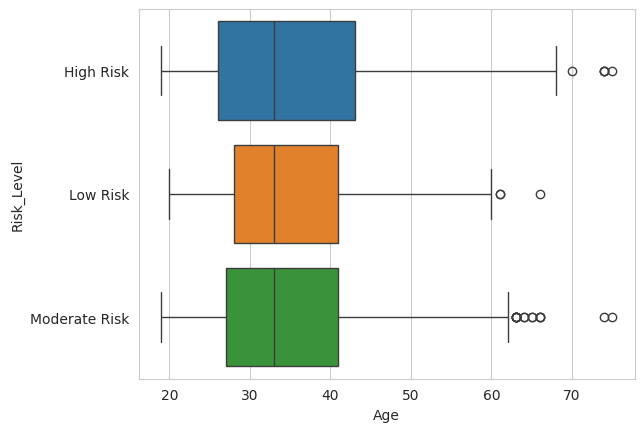

In [224]:
# Plot age vs risk level
sns.boxplot(x='Age', y='Risk_Level', hue='Risk_Level',data=new_df)

In [225]:
high_risk_df = new_df[new_df['Risk_Level'] == "High Risk"]
mod_risk_df = new_df[new_df['Risk_Level'] == "Moderate Risk"]
low_risk_df = new_df[new_df['Risk_Level'] == "Low Risk"]

<Axes: xlabel='Age', ylabel='Credit amount'>

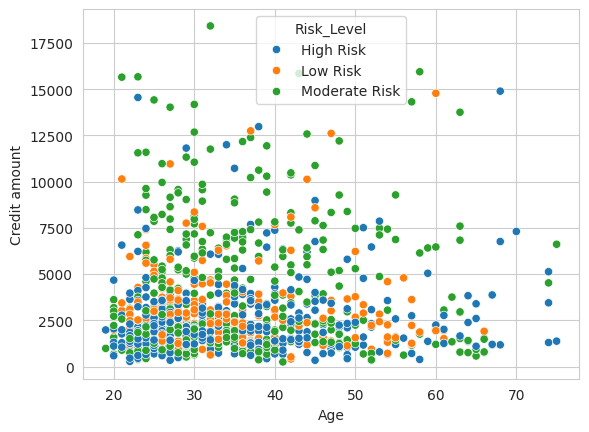

In [226]:
sns.scatterplot(x='Age', y='Credit amount',hue='Risk_Level',data=new_df)

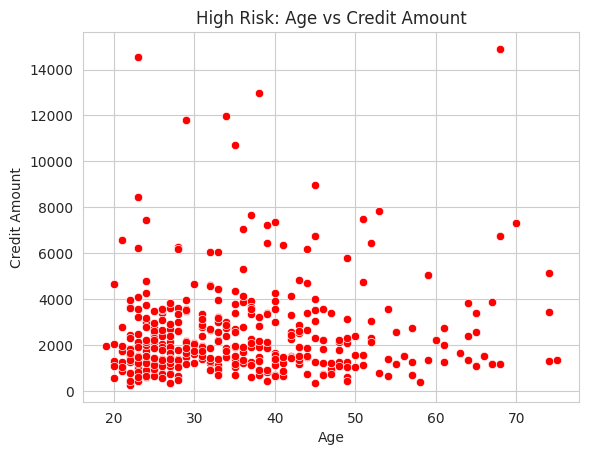

In [227]:
# Scatter plot for High Risk individuals
sns.scatterplot(x='Age', y='Credit amount', data=high_risk_df, color='Red')
plt.title('High Risk: Age vs Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()


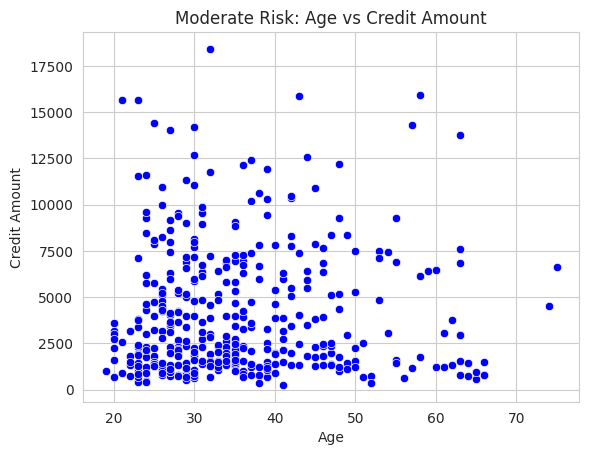

In [228]:
# Scatter plot for Moderate Risk individuals
sns.scatterplot(x='Age', y='Credit amount', data=mod_risk_df, color='blue')
plt.title('Moderate Risk: Age vs Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()


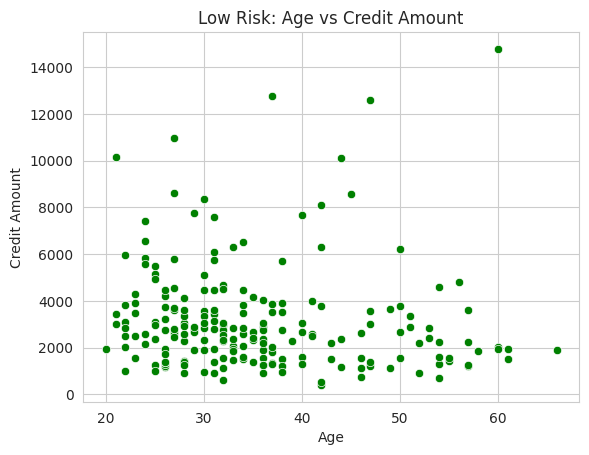

In [229]:
# Scatter plot for Moderate Risk individuals
sns.scatterplot(x='Age', y='Credit amount', data=low_risk_df, color='Green')
plt.title('Low Risk: Age vs Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()

<Axes: xlabel='Job', ylabel='count'>

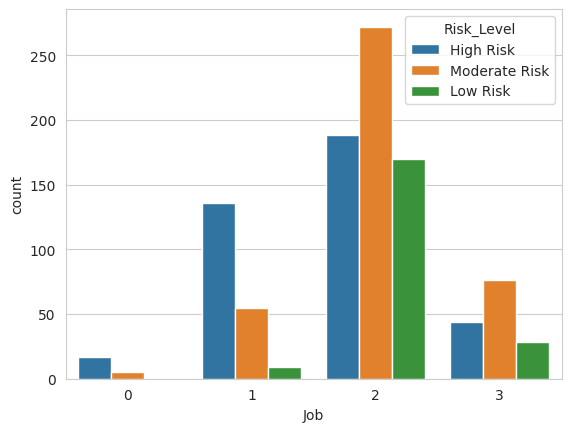

In [230]:
# Job vs Risk Level
sns.countplot(x='Job', hue='Risk_Level', data=new_df)

<Axes: xlabel='Housing', ylabel='count'>

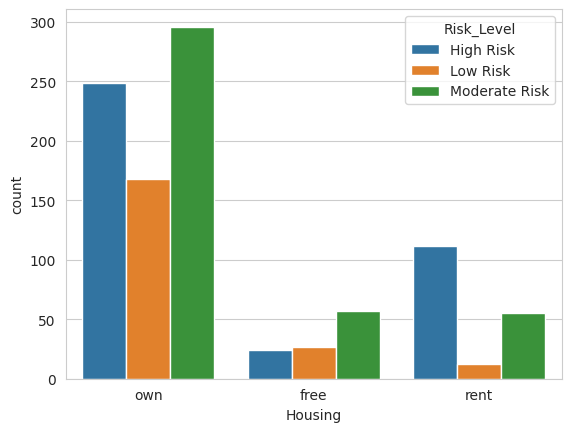

In [231]:
# Housing vs Risk Level
sns.countplot(x='Housing', hue='Risk_Level', data=new_df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

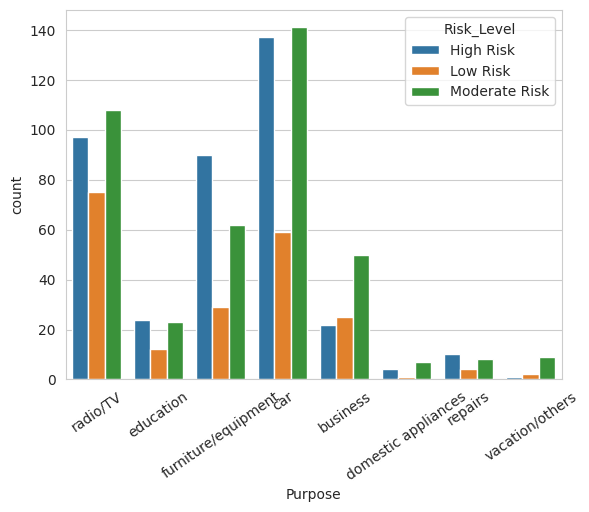

In [232]:
sns.countplot(x='Purpose', hue='Risk_Level', data=new_df)
plt.xticks(rotation=35)

In [233]:
new_df.sample()

,Age,Job,Housing,Credit amount,Duration,Purpose,credit_repayment_per_month,Saving accounts_num,Checking account_num,Years_to_repay,Risk_Score,Risk_Level
608,33,2,own,2051,18,radio/TV,113.944444,1.0,2.0,1.5,7,Moderate Risk


<Axes: xlabel='Duration', ylabel='Count'>

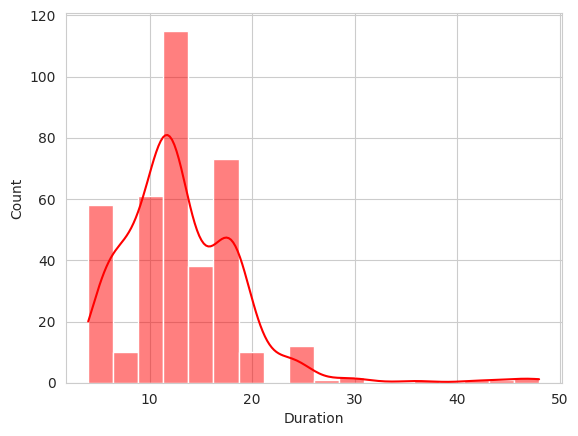

In [234]:
sns.histplot(x='Duration', data=high_risk_df, color='Red', kde=True)

<Axes: xlabel='Duration', ylabel='Count'>

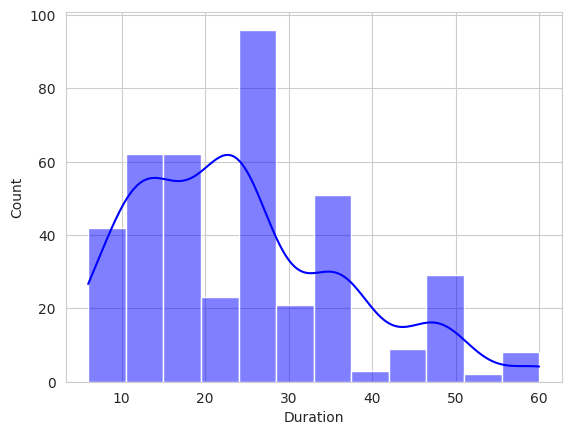

In [235]:
sns.histplot(x='Duration', data=mod_risk_df,color='Blue', kde=True)

<Axes: xlabel='Duration', ylabel='Count'>

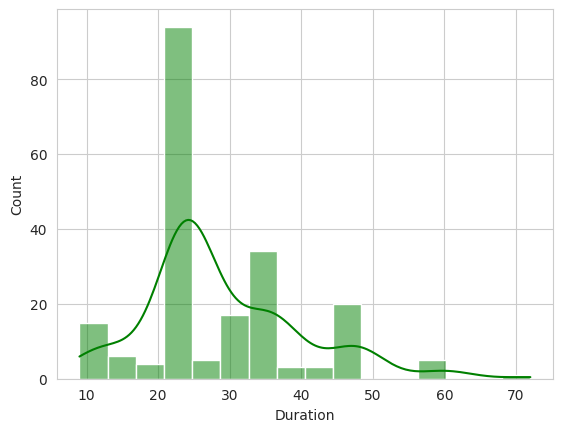

In [236]:
sns.histplot(x='Duration', data=low_risk_df, color='Green', kde=True)


## Model/ Encoding

In [237]:
new_df.sample()

,Age,Job,Housing,Credit amount,Duration,Purpose,credit_repayment_per_month,Saving accounts_num,Checking account_num,Years_to_repay,Risk_Score,Risk_Level
100,41,1,rent,1469,24,car,61.208333,2.0,2.0,2.0,6,Moderate Risk


In [238]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [239]:
new_df = new_df.drop(columns=['Years_to_repay', 'Risk_Score'])

In [240]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Job                         1000 non-null   int64  
 2   Housing                     1000 non-null   object 
 3   Credit amount               1000 non-null   int64  
 4   Duration                    1000 non-null   int64  
 5   Purpose                     1000 non-null   object 
 6   credit_repayment_per_month  1000 non-null   float64
 7   Saving accounts_num         1000 non-null   float64
 8   Checking account_num        1000 non-null   float64
 9   Risk_Level                  1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.3+ KB


In [241]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [242]:
numeric_features = ['Age', 'Credit amount', 'Duration', 'credit_repayment_per_month']
categorical_features = ['Housing', 'Purpose']

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(sparse_output=False, drop='if_binary'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [243]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Credit amount', 'Duration',
                                  'credit_repayment_per_month']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['Housing', 'Purpose'])])

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [245]:
X = new_df[numeric_features + categorical_features]
new_df['Risk_Level'] = new_df['Risk_Level'].replace({'High Risk':1, 'Moderate Risk':2, 'Low Risk':3})
y = new_df['Risk_Level']  # or whatever your label column is

X_preprocessed = preprocessor.fit_transform(X)


/tmp/ipython-input-2951915724.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Risk_Level'] = new_df['Risk_Level'].replace({'High Risk':1, 'Moderate Risk':2, 'Low Risk':3})


In [246]:
y

,Risk_Level
0,1
1,3
2,1
3,2
4,2
...,...
995,1
996,2
997,2
998,2


In [247]:
X_preprocessed

array([[ 2.76645648, -0.74513141, -1.23647786, ...,  1.        ,
         0.        ,  0.        ],
       [-1.19140394,  0.94981679,  2.24819436, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.18331231, -0.41656241, -0.73866754, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.21583532, -0.87450324, -0.73866754, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10345149, -0.50552769,  1.9992892 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.75164167,  0.46245715,  1.9992892 , ...,  0.        ,
         0.        ,  0.        ]])

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y, test_size=0.2, random_state=27)

## Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
lr_class = LogisticRegression()

In [250]:
lr_class.fit(X_train, y_train)

LogisticRegression()

In [251]:
lr_class.coef_

array([[ 0.07250946, -0.03121578, -1.34721031,  0.86314343, -0.58313787,
        -0.3374686 ,  0.9224655 , -0.03310569, -0.04110117,  0.26051616,
        -0.08120412,  0.16439212, -0.24510507,  0.53377648, -0.55630968],
       [-0.04847682,  0.2956174 ,  0.16533403,  0.07761801,  0.17858894,
        -0.05152127, -0.11327499,  0.05176107, -0.10933685,  0.6451065 ,
        -0.06225318, -0.38619095, -0.08562009, -0.36820372,  0.32852991],
       [-0.02403265, -0.26440162,  1.18187628, -0.94076144,  0.40454893,
         0.38898987, -0.80919051, -0.01865537,  0.15043803, -0.90562267,
         0.1434573 ,  0.22179883,  0.33072516, -0.16557276,  0.22777977]])

In [252]:
lr_class.score(X_train, y_train), lr_class.score(X_test, y_test)

(0.63, 0.68)

In [253]:
from sklearn.metrics import mean_absolute_error

In [254]:
mean_absolute_error(y_train, lr_class.predict(X_train))

0.39

In [255]:
mean_absolute_error(y_test, lr_class.predict(X_test))

0.34

In [257]:
lr_scores = cross_val_score(lr_class, X_preprocessed, y, cv=5)

In [258]:
lr_scores

array([0.62 , 0.615, 0.62 , 0.645, 0.66 ])

## Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
dt = DecisionTreeClassifier(max_depth=5)

In [261]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [262]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.73875, 0.695)

In [263]:
scores = cross_val_score(dt, X_preprocessed, y, cv=5) # using dt(decision tree model)

In [264]:
scores

array([0.655, 0.61 , 0.74 , 0.64 , 0.725])

In [265]:
scores.mean(), scores.std()

(np.float64(0.674), np.float64(0.0501398045468867))

In [266]:
param_grid={
    'max_depth' : [3,4,6,8],
    'min_samples_leaf': [10,20,30]
}

In [267]:
from sklearn.model_selection import ParameterGrid
# Parameter Grid = ALL POSSIBLE COMBOS of values
# OF 2 HYPERPARAMETERS FOR DECISION TREE (4 max depth x 3 min sample leaf = 12 configurations)
# to check list of configurations
list(ParameterGrid(param_grid))

[{'max_depth': 3, 'min_samples_leaf': 10},
 {'max_depth': 3, 'min_samples_leaf': 20},
 {'max_depth': 3, 'min_samples_leaf': 30},
 {'max_depth': 4, 'min_samples_leaf': 10},
 {'max_depth': 4, 'min_samples_leaf': 20},
 {'max_depth': 4, 'min_samples_leaf': 30},
 {'max_depth': 6, 'min_samples_leaf': 10},
 {'max_depth': 6, 'min_samples_leaf': 20},
 {'max_depth': 6, 'min_samples_leaf': 30},
 {'max_depth': 8, 'min_samples_leaf': 10},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 8, 'min_samples_leaf': 30}]

In [268]:
clf = GridSearchCV(dt, param_grid, return_train_score=True)

In [269]:
gs_results = clf.fit(X_train, y_train)


In [270]:
gs_df = pd.DataFrame(gs_results.cv_results_)

In [271]:
gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [272]:
gs_df_sh = gs_df[[
    'param_max_depth', 'param_min_samples_leaf', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]] .sort_values('rank_test_score')
gs_df_sh

,param_max_depth,param_min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
3,4,10,0.704063,0.007167,0.66750,0.030974,1
4,4,20,0.698125,0.005538,0.66625,0.044300,2
1,3,20,0.691250,0.007167,0.66500,0.040812,3
0,3,10,0.691250,0.007167,0.66500,0.040812,3
7,6,20,0.718750,0.005502,0.66375,0.018708,5
10,8,20,0.719688,0.006297,0.66125,0.023184,6
6,6,10,0.736250,0.006659,0.65000,0.020540,7
2,3,30,0.680312,0.007099,0.64125,0.034596,8
5,4,30,0.689375,0.008750,0.63625,0.038609,9
8,6,30,0.695625,0.009499,0.63125,0.038931,10


In [273]:
gs_results.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [274]:
best_dt = gs_results.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

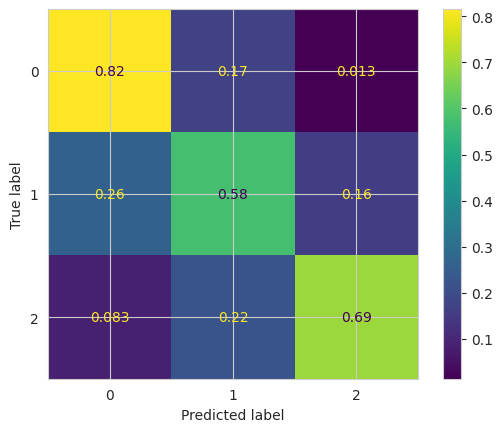

In [275]:
# Can now plot confusion matrix for best model
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, best_dt.predict(X_test), normalize='true')
).plot();

In [276]:
X_preprocessed

array([[ 2.76645648, -0.74513141, -1.23647786, ...,  1.        ,
         0.        ,  0.        ],
       [-1.19140394,  0.94981679,  2.24819436, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.18331231, -0.41656241, -0.73866754, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.21583532, -0.87450324, -0.73866754, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10345149, -0.50552769,  1.9992892 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.75164167,  0.46245715,  1.9992892 , ...,  0.        ,
         0.        ,  0.        ]])

## Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
lr_class_perm_importance = permutation_importance(lr_class, X_test, y_test, n_repeats=30, random_state=27, scoring='r2')
dt_class_perm_importance = permutation_importance(best_dt, X_test, y_test, n_repeats=30, random_state=27, scoring='r2' )

## SHAP

In [ ]:
!pip install shap --upgrade -q
import shap
shap.initjs()

In [ ]:
X_train_pp = X_train
column_names=X.columns
X_test_pp = X_test

In [ ]:
explainer = shap.Explainer(best_dt, X_train_pp)

In [ ]:
explanations = explainer(X_test_pp, check_additivity=False)

In [ ]:
explanations.shape

In [ ]:
# Let us have a look at the feature effect assignments to a single prediction
# Assume we would like to investigate the positive class (has diabetes)
cls_idx = 1
# we can investigate a local explanation (positional index is 0)
row_idx = 0

In [ ]:
cls_idx, row_idx

In [ ]:
shap.plots.waterfall(explanations[row_idx, :, cls_idx])

In [ ]:
shap.initjs()
shap.plots.force(explanations[row_idx,:, cls_idx])

In [ ]:
shap_values = explainer.shap_values(X_test, check_additivity=False)


In [ ]:
shap.plots.beeswarm(explanations[:,:,cls_idx])

In [ ]:
X.columns

# Deploy Model

Streamlit for prototyping ML apps

In [277]:
!pip install streamlit

In [ ]:
X.columns

In [ ]:
X['Purpose']

In [ ]:
X['Checking account_num'].value_counts()

In [278]:
best_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [280]:
import joblib

joblib.dump(best_dt, 'best_dt.pkl')


['best_dt.pkl']

In [279]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.12/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: cuml-cu12, fastai, hdbscan, imbalanced-learn, libpysal, librosa, mlxtend, pynndescent, sentence-transformers, shap, sklearn-pandas, tsfresh, umap-learn, yellowbrick


In [281]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [363]:
import streamlit as st
import joblib  # or pickle

# Load models and preprocessing pipeline
#log_model = joblib.load('log_model.pkl')
tree_model = joblib.load('best_dt.pkl')
preprocessor = joblib.load('preprocessor.pkl')

st.title("Credit Risk Prediction")

checking_map = {'Little': 0, 'Moderate': 1, 'Rich': 2}
savings_map = {'Little': 0, 'Moderate': 1, 'Rich': 2, 'Quite Rich': 3}


# Collect user input
input_data = pd.DataFrame({
    'Age': [age],
    'Housing': [house],
    'Purpose': [purpose],
    'checking_account_num': [checking_map[checking_account]],
    'saving_accounts_num': [savings_map[savings_account]],
    'Credit amount': [credit_amount],
    'Duration': [duration],
    'credit_repayment_per_month': [credit_amount / duration]
})

# Preprocess input
X_input = preprocessor.transform(input_data)

# Predict
#log_pred = log_model.predict_proba(X_input)[0][1]
tree_pred = tree_model.predict_proba(X_input)[0][1]

st.subheader("Prediction Scores")
#st.write(f"Logistic Regression: {log_pred:.2f}")
st.write(f"Decision Tree: {tree_pred:.2f}")


2025-10-23 15:52:02.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 15:52:02.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [369]:
!streamlit run /content/drive/MyDrive/Banking Data Science/CreditRiskPrediction.ipynb


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io
